# Machine Learning

Machine learning (ML) is a subset of artificial intelligence (AI) that focuses on developing algorithms that allow computers to learn from and make predictions based on data. This chapter provides an overview of the main concepts in machine learning, including key theoretical aspects, and focuses on supervised and unsupervised learning, overfitting, underfitting, and the bias-variance tradeoff. We will also delve into tree-based methods and their extensions, specifically for regression tasks.

### 3.1 Fundamental Concepts

#### 3.1.1 Supervised vs. Unsupervised Learning

**Supervised Learning**: In supervised learning, the algorithm is trained on a labeled dataset, meaning that each training example is paired with an output label. The goal is to learn a mapping from inputs to outputs. Common tasks in supervised learning include:

- **Regression**: Predicting a continuous value. Example: Predicting house prices based on features like size, location, and age.
- **Classification**: Predicting a discrete label. Example: Identifying whether an email is spam or not based on its content.

**Unsupervised Learning**: In unsupervised learning, the algorithm is given data without explicit instructions on what to do with it. The goal is to infer the natural structure present within a set of data points. Common tasks in unsupervised learning include:

- **Clustering**: Grouping similar data points together. Example: Customer segmentation based on purchasing behavior.
- **Dimensionality Reduction**: Reducing the number of features while retaining the most important information. Example: Principal Component Analysis (PCA) for visualizing high-dimensional data.

#### 3.1.2 Overfitting and Underfitting

**Overfitting**: Overfitting occurs when a model learns the details and noise in the training data to the extent that it negatively impacts the performance of the model on new data. This usually happens when the model is too complex relative to the amount of training data. An overfitted model performs well on training data but poorly on validation or test data.

**Underfitting**: Underfitting occurs when a model is too simple to capture the underlying structure of the data. This results in poor performance on both the training data and new data. An underfitted model fails to capture the important patterns in the data.

**Bias-Variance Tradeoff**: The bias-variance tradeoff is a key concept in understanding model performance. Bias refers to the error introduced by approximating a real-world problem, which may be complex, by a simpler model. Variance refers to the model's sensitivity to fluctuations in the training set. A model with high bias pays little attention to the training data and oversimplifies the model (underfitting), while a model with high variance pays too much attention to the training data, including noise (overfitting). The goal is to find a balance where both bias and variance are minimized.

**Example of Overfitting and Underfitting**:

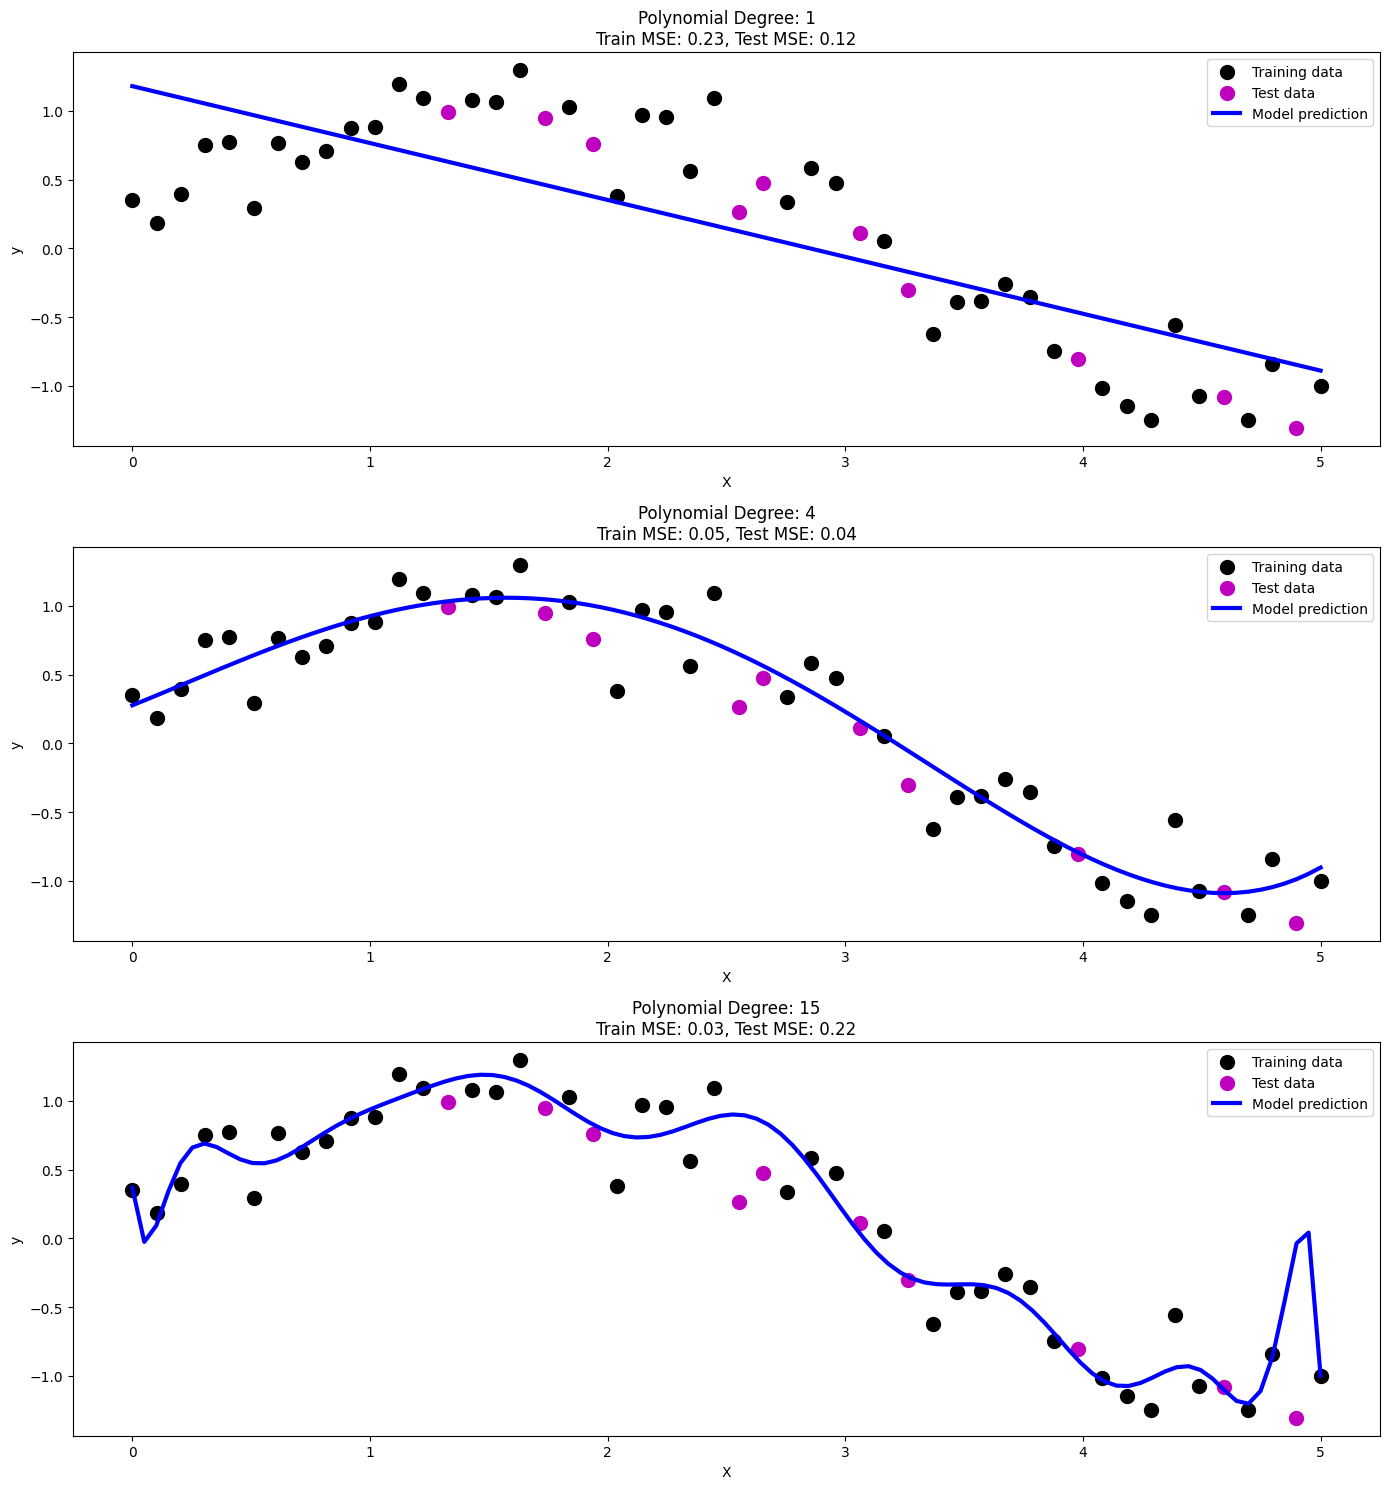

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(0)
X = np.linspace(0, 5, num=50).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.randn(50) * 0.2

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to plot model
def plot_models(degrees, X_train, y_train, X_test, y_test):
    plt.figure(figsize=(14, 15))
    
    for i, degree in enumerate(degrees, start=1):
        polynomial_features = PolynomialFeatures(degree=degree)
        X_train_poly = polynomial_features.fit_transform(X_train)
        X_test_poly = polynomial_features.fit_transform(X_test)
        
        model = LinearRegression()
        model.fit(X_train_poly, y_train)
        y_train_pred = model.predict(X_train_poly)
        y_test_pred = model.predict(X_test_poly)
        
        # Plotting the fitted line using the whole range of X for a smoother curve
        X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
        X_plot_poly = polynomial_features.transform(X_plot)
        y_plot_pred = model.predict(X_plot_poly)
        
        plt.subplot(len(degrees), 1, i)
        plt.scatter(X_train, y_train, label='Training data', c='k', s=100)
        plt.scatter(X_test, y_test, label='Test data', c='m', s=100)
        plt.plot(X_plot, y_plot_pred, color='b', label='Model prediction', lw=3)
        plt.title(f'Polynomial Degree: {degree}\nTrain MSE: {mean_squared_error(y_train, y_train_pred):.2f}, Test MSE: {mean_squared_error(y_test, y_test_pred):.2f}')
        plt.xlabel('X')
        plt.ylabel('y')
        plt.legend()
    
    plt.tight_layout()
    plt.show()

# Plotting models
degrees = [1, 4, 15]
plot_models(degrees, X_train, y_train, X_test, y_test)  # Underfitting, Good fit, Overfitting


### 3.2 Tree-Based Methods for Regression

Tree-based methods are popular in machine learning for their interpretability and flexibility. They can model complex relationships without requiring extensive data preprocessing.

#### 3.2.1 Decision Trees for Regression

**Decision Trees**: A decision tree is a non-parametric model that splits the data into subsets based on the value of the features, creating a tree-like structure. Each node represents a feature, each branch represents a decision rule, and each leaf represents a predicted value.

**Algorithm**: The most common algorithm for regression trees is CART (Classification and Regression Trees). The quality of a split is measured using metrics like mean squared error (MSE) or mean absolute error (MAE).

**Advantages**: Easy to interpret, require little data preprocessing, can handle both numerical and categorical data, and can model nonlinear relationships.

**Disadvantages**: Prone to overfitting, especially with deep trees, and can be unstable as small variations in the data might result in different splits.

**Example**:

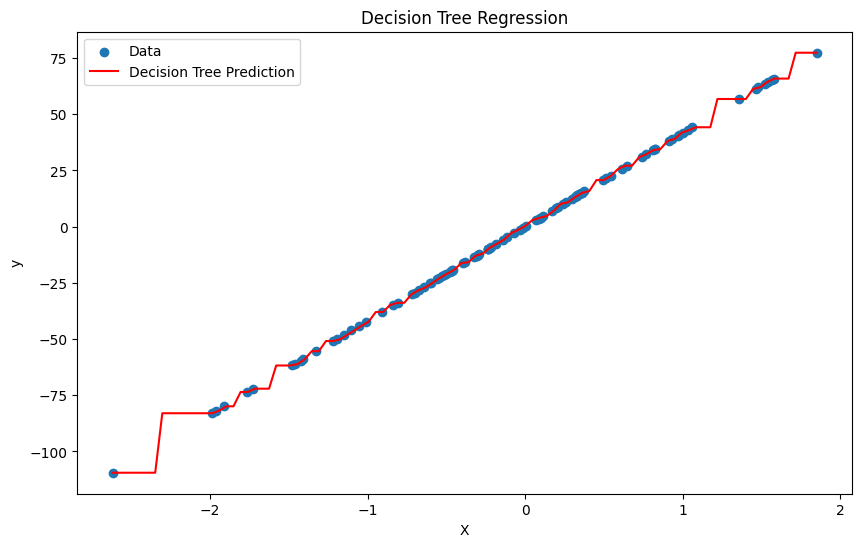

In [2]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)

# Train decision tree regressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X, y)

# Predict
X_test = np.linspace(min(X), max(X), 100).reshape(-1, 1)
y_pred = tree_reg.predict(X_test)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data')
plt.plot(X_test, y_pred, color='red', label='Decision Tree Prediction')
plt.title('Decision Tree Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

#### 3.2.2 Random Forests for Regression

**Random Forests**: Random forests are an ensemble method that combines multiple decision trees to improve performance. Each tree is trained on a random subset of the data and features, and the final prediction is the average of all trees' predictions.

**Algorithm**: The random forest algorithm involves bagging (bootstrap aggregating) and feature randomness, which helps in reducing overfitting and improving generalization.

**Advantages**: Robust to overfitting, handle large datasets well, provide feature importance measures, and can model complex relationships.

**Disadvantages**: Computationally intensive and less interpretable compared to a single decision tree.

**Example**:

MSE: 1.1205671165564755


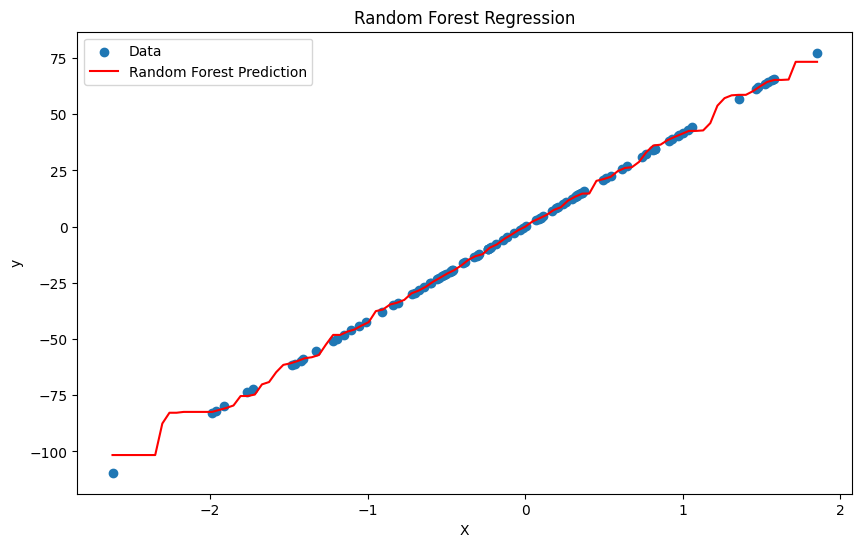

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train random forest regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

# Plotting
X_grid = np.linspace(min(X), max(X), 100).reshape(-1, 1)
y_grid_pred = rf_reg.predict(X_grid)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data')
plt.plot(X_grid, y_grid_pred, color='red', label='Random Forest Prediction')
plt.title('Random Forest Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

#### 3.2.3 Gradient Boosting Machines for Regression

**Gradient Boosting**: Gradient boosting is an ensemble technique that builds trees sequentially, where each tree tries to correct the errors of the previous one. The models are combined by weighting them according to their performance.

**Algorithm**: The algorithm involves fitting a decision tree to the residual errors of the previous tree and updating the predictions by adding the new tree's predictions, scaled by a learning rate.

**Advantages**: Can achieve higher accuracy than random forests, especially on structured/tabular data, and provides feature importance measures.

**Disadvantages**: Prone to overfitting if not carefully tuned and generally more complex and computationally expensive than random forests.

**Example (XGBoost)**:

In [4]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Generate synthetic data
X, y = make_reg

ression(n_samples=100, n_features=1, noise=0.1, random_state=42)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train XGBoost model
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
xgb_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

# Plotting
X_grid = np.linspace(min(X), max(X), 100).reshape(-1, 1)
y_grid_pred = xgb_reg.predict(X_grid)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data')
plt.plot(X_grid, y_grid_pred, color='red', label='XGBoost Prediction')
plt.title('XGBoost Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

NameError: name 'make_reg' is not defined


### 3.3 Extensions of Tree-Based Methods for Regression

#### 3.3.1 Feature Importance

Tree-based methods can provide insights into which features are most important for making predictions. This is useful for understanding the model and for feature selection.

**Example**:

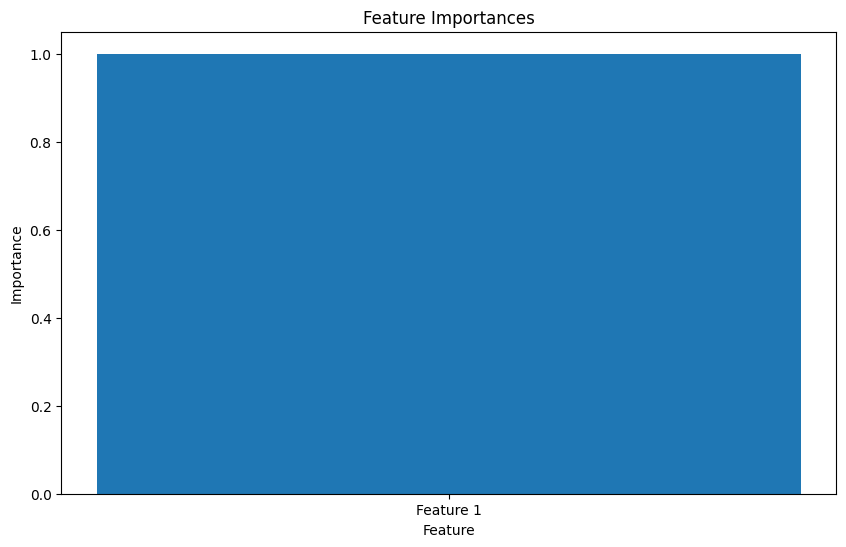

In [5]:
import numpy as np

# Train random forest regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Get feature importances
importances = rf_reg.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [f'Feature {i+1}' for i in indices])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()


#### 3.3.2 Handling Imbalanced Data in Regression

While handling imbalanced data is more commonly discussed in the context of classification, it can also be relevant in regression when dealing with skewed distributions or outlier-heavy datasets. Techniques include using robust loss functions, balancing data through resampling, or using ensemble methods that are less sensitive to imbalances.

### 3.4 Summary

Machine learning encompasses a wide array of techniques and methodologies aimed at building models that can learn from data and make predictions. Key concepts such as overfitting, underfitting, and the bias-variance tradeoff are crucial for understanding model performance. Supervised learning involves training models on labeled data, while unsupervised learning involves discovering patterns in unlabeled data. Tree-based methods, including decision trees, random forests, and gradient boosting machines, are powerful tools for regression tasks, offering flexibility and interpretability. Extensions of these methods, like feature importance and handling imbalanced data, enhance their applicability and robustness in various real-world scenarios.